In [84]:
# imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

---

## **Loading Dataset**

In [4]:
df=pd.read_csv('D:\\Github\\PRODIGY_DS_02\\data\\train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


---
## **Data Understanding**

In [5]:
df.info()
df.describe()
df.shape
df.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [ ]:
df.select_dtypes(include=['object','category']).columns.tolist()


['Survived', 'Name', 'Sex', 'Ticket', 'Embarked']

In [32]:
df.select_dtypes(include='number').columns.tolist()


['PassengerId',
 'Pclass',
 'Age',
 'SibSp',
 'Parch',
 'Fare',
 'FamilySize',
 'IsAlone']

---
## **Data Cleaning**

### Handling Null Values

In [6]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
df.drop(columns=['Cabin'],inplace=True)
df['Age'].fillna(df['Age'].median(),inplace=True)
df['Embarked'].fillna(df['Embarked'].mode(),inplace=True)

C:\Users\Professor\AppData\Local\Temp\ipykernel_16744\3401637111.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(),inplace=True)
C:\Users\Professor\AppData\Local\Temp\ipykernel_16744\3401637111.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

### Detecting Duplicate Rows

In [8]:
df.duplicated().sum()
# df.drop_duplicates(inplace=True)

np.int64(0)

### Data Type Fixing

In [ ]:
df['Survived']=df['Survived'].astype('category')
df['Age']=df['Age'].astype(int)


---
## **Feature Engineering**

In [10]:
df['FamilySize']=df['SibSp']+df['Parch']+1
df['IsAlone']=(df['FamilySize']==1).astype(int)

---
## **Univariate Analysis**

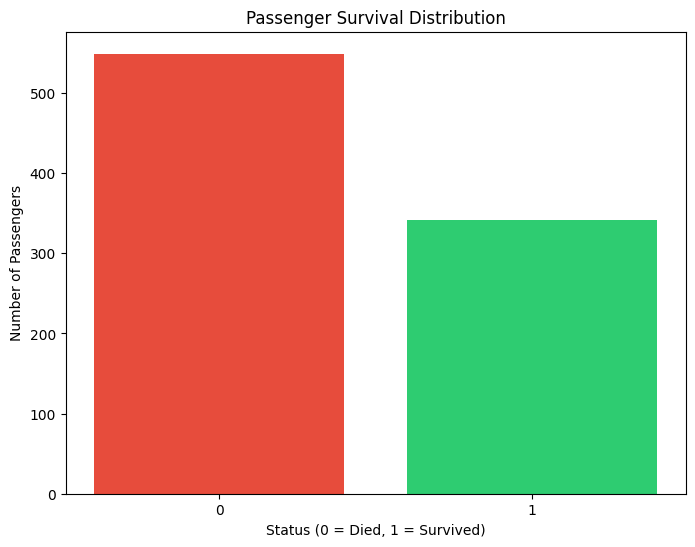

In [ ]:
survival_counts=df['Survived'].value_counts()
plt.figure(figsize=(8,6))
plt.bar(survival_counts.index.astype(str),survival_counts.values,color=['#e74c3c', '#2ecc71'])
plt.title('Passenger Survival Distribution')
plt.xlabel('Status (0 = Died, 1 = Survived)')
plt.ylabel('Number of Passengers')
plt.show()

# Insight:
# 549 Passegers didn't survive (61%) and 342 Passengers survived (39%)

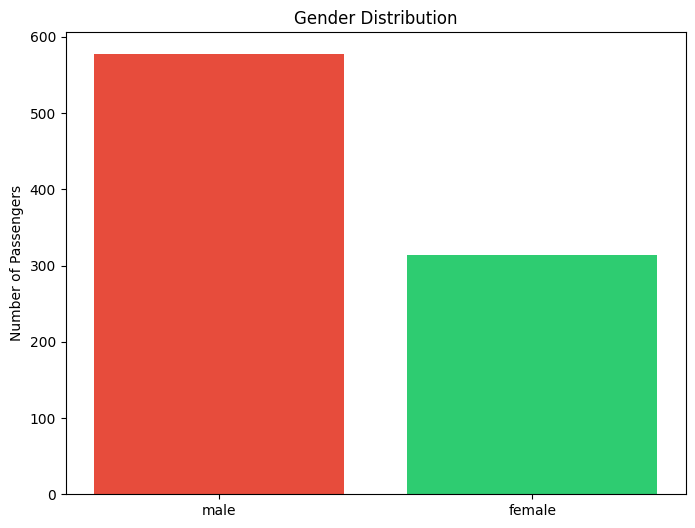

In [ ]:
gender_counts=df['Sex'].value_counts()
plt.figure(figsize=(8,6))
plt.bar(survival_counts.index.astype(str),survival_counts.values,color=['#e74c3c', '#2ecc71'])
plt.title('Gender Distribution')
plt.ylabel('Number of Passengers')
plt.show()

# Insight:
# 577 (65%) were male passengers and 314 (35%) female passengers

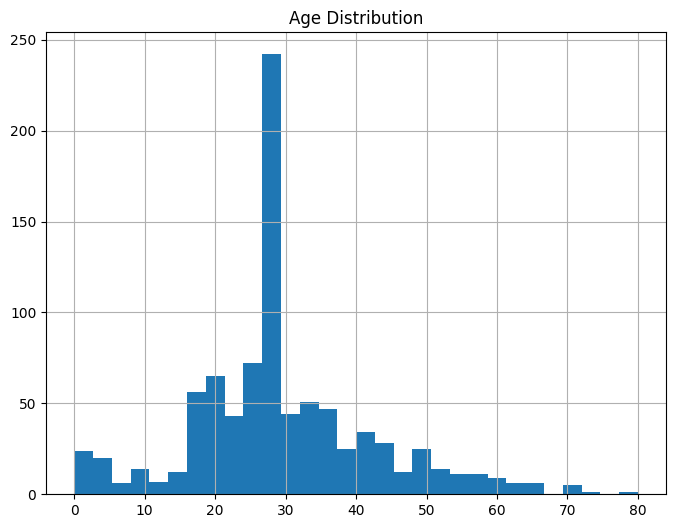

In [ ]:
plt.figure(figsize=(8,6))
plt.hist(df['Age'],bins=30)
plt.title('Age Distribution')
plt.grid()
plt.show()

# Insights
# Mostly Passengers were under 30 Adults with 22% being 28 Y/O

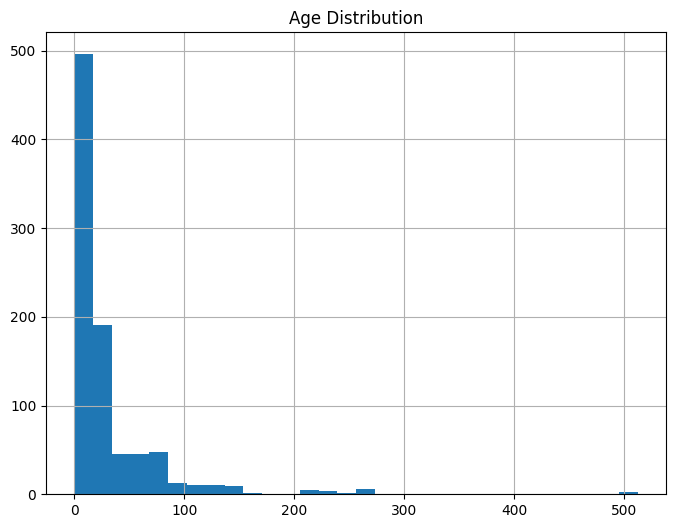

In [ ]:
plt.figure(figsize=(8,6))
plt.hist(df['Fare'],bins=30)
plt.title('Age Distribution')
plt.grid()
plt.show()

# Insights
# Age Distribution Graph is Skewed

---
## **Bivariate Analysis**

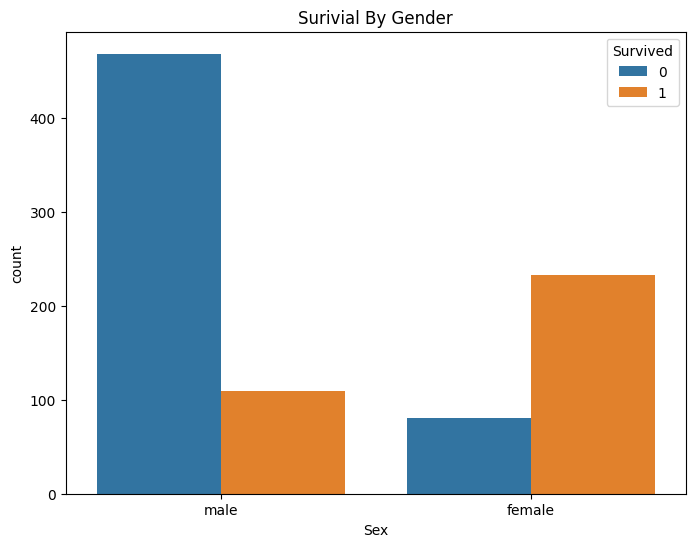

In [ ]:
plt.figure(figsize=(8,6))
sns.countplot(x='Sex', hue='Survived', data=df)
plt.title('Surivial By Gender')
plt.show()

# Insight:
# Female Survival Rate is significantly higher than mala Survival Rate

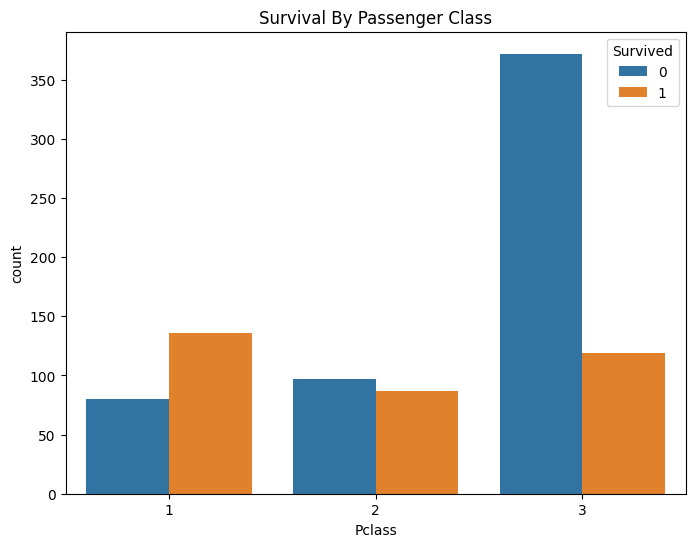

In [ ]:
plt.figure(figsize=(8,6))
sns.countplot(x='Pclass',hue='Survived',data=df)
plt.title('Survival By Passenger Class')
plt.show()

# Insight:
# 1st Class Survived More than 2nd & 3rd class

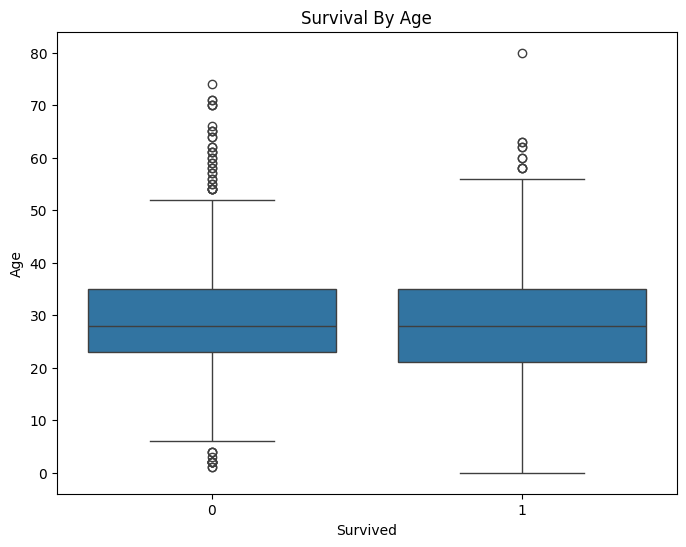

In [ ]:
plt.figure(figsize=(8,6))
sns.boxplot(x='Survived',y='Age',data=df)
plt.title('Survival By Age')
plt.show()

# Insights : Children had higher survival rate

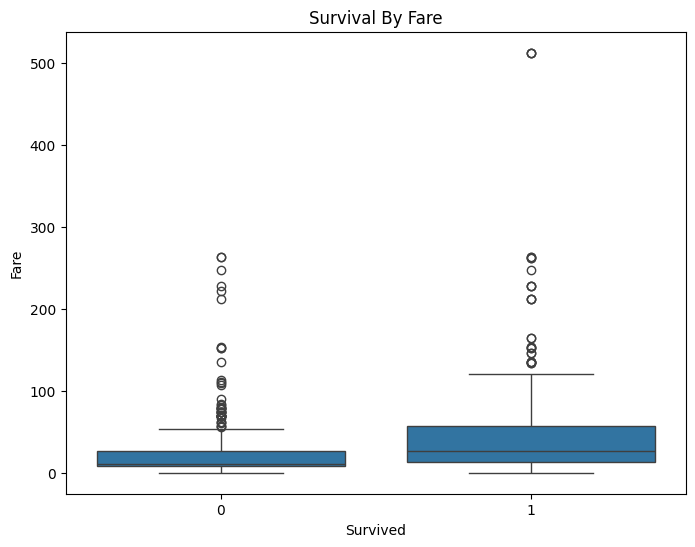

In [ ]:
plt.figure(figsize=(8,6))
sns.boxplot(x='Survived',y='Fare',data=df)
plt.title('Survival By Fare')
plt.show()

# Insights : Higher Fare = Higher survival probability

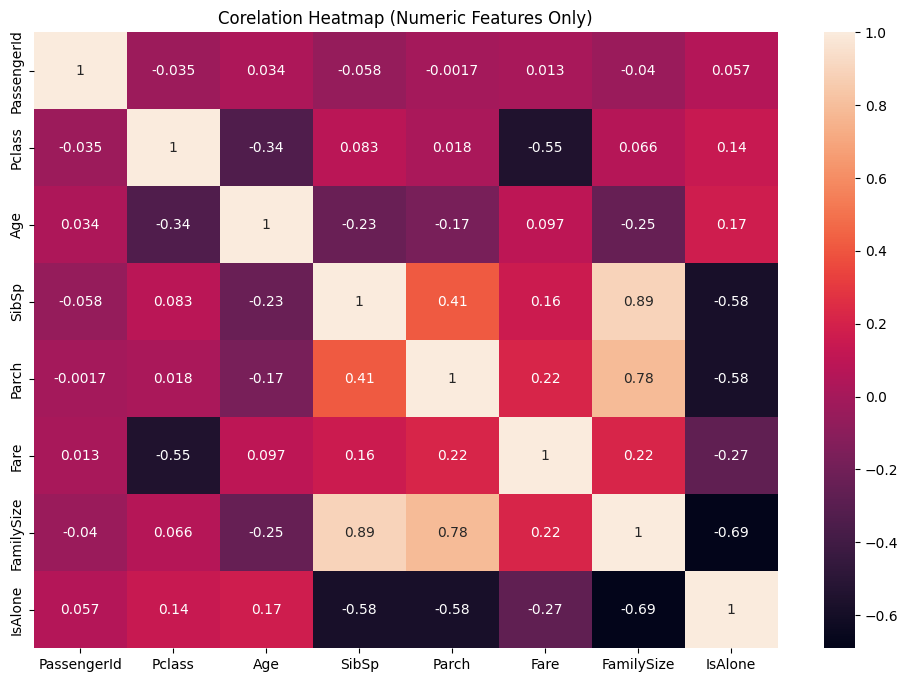

In [114]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(numeric_only=True), annot=True)
plt.title('Corelation Heatmap (Numeric Features Only)')
plt.show()

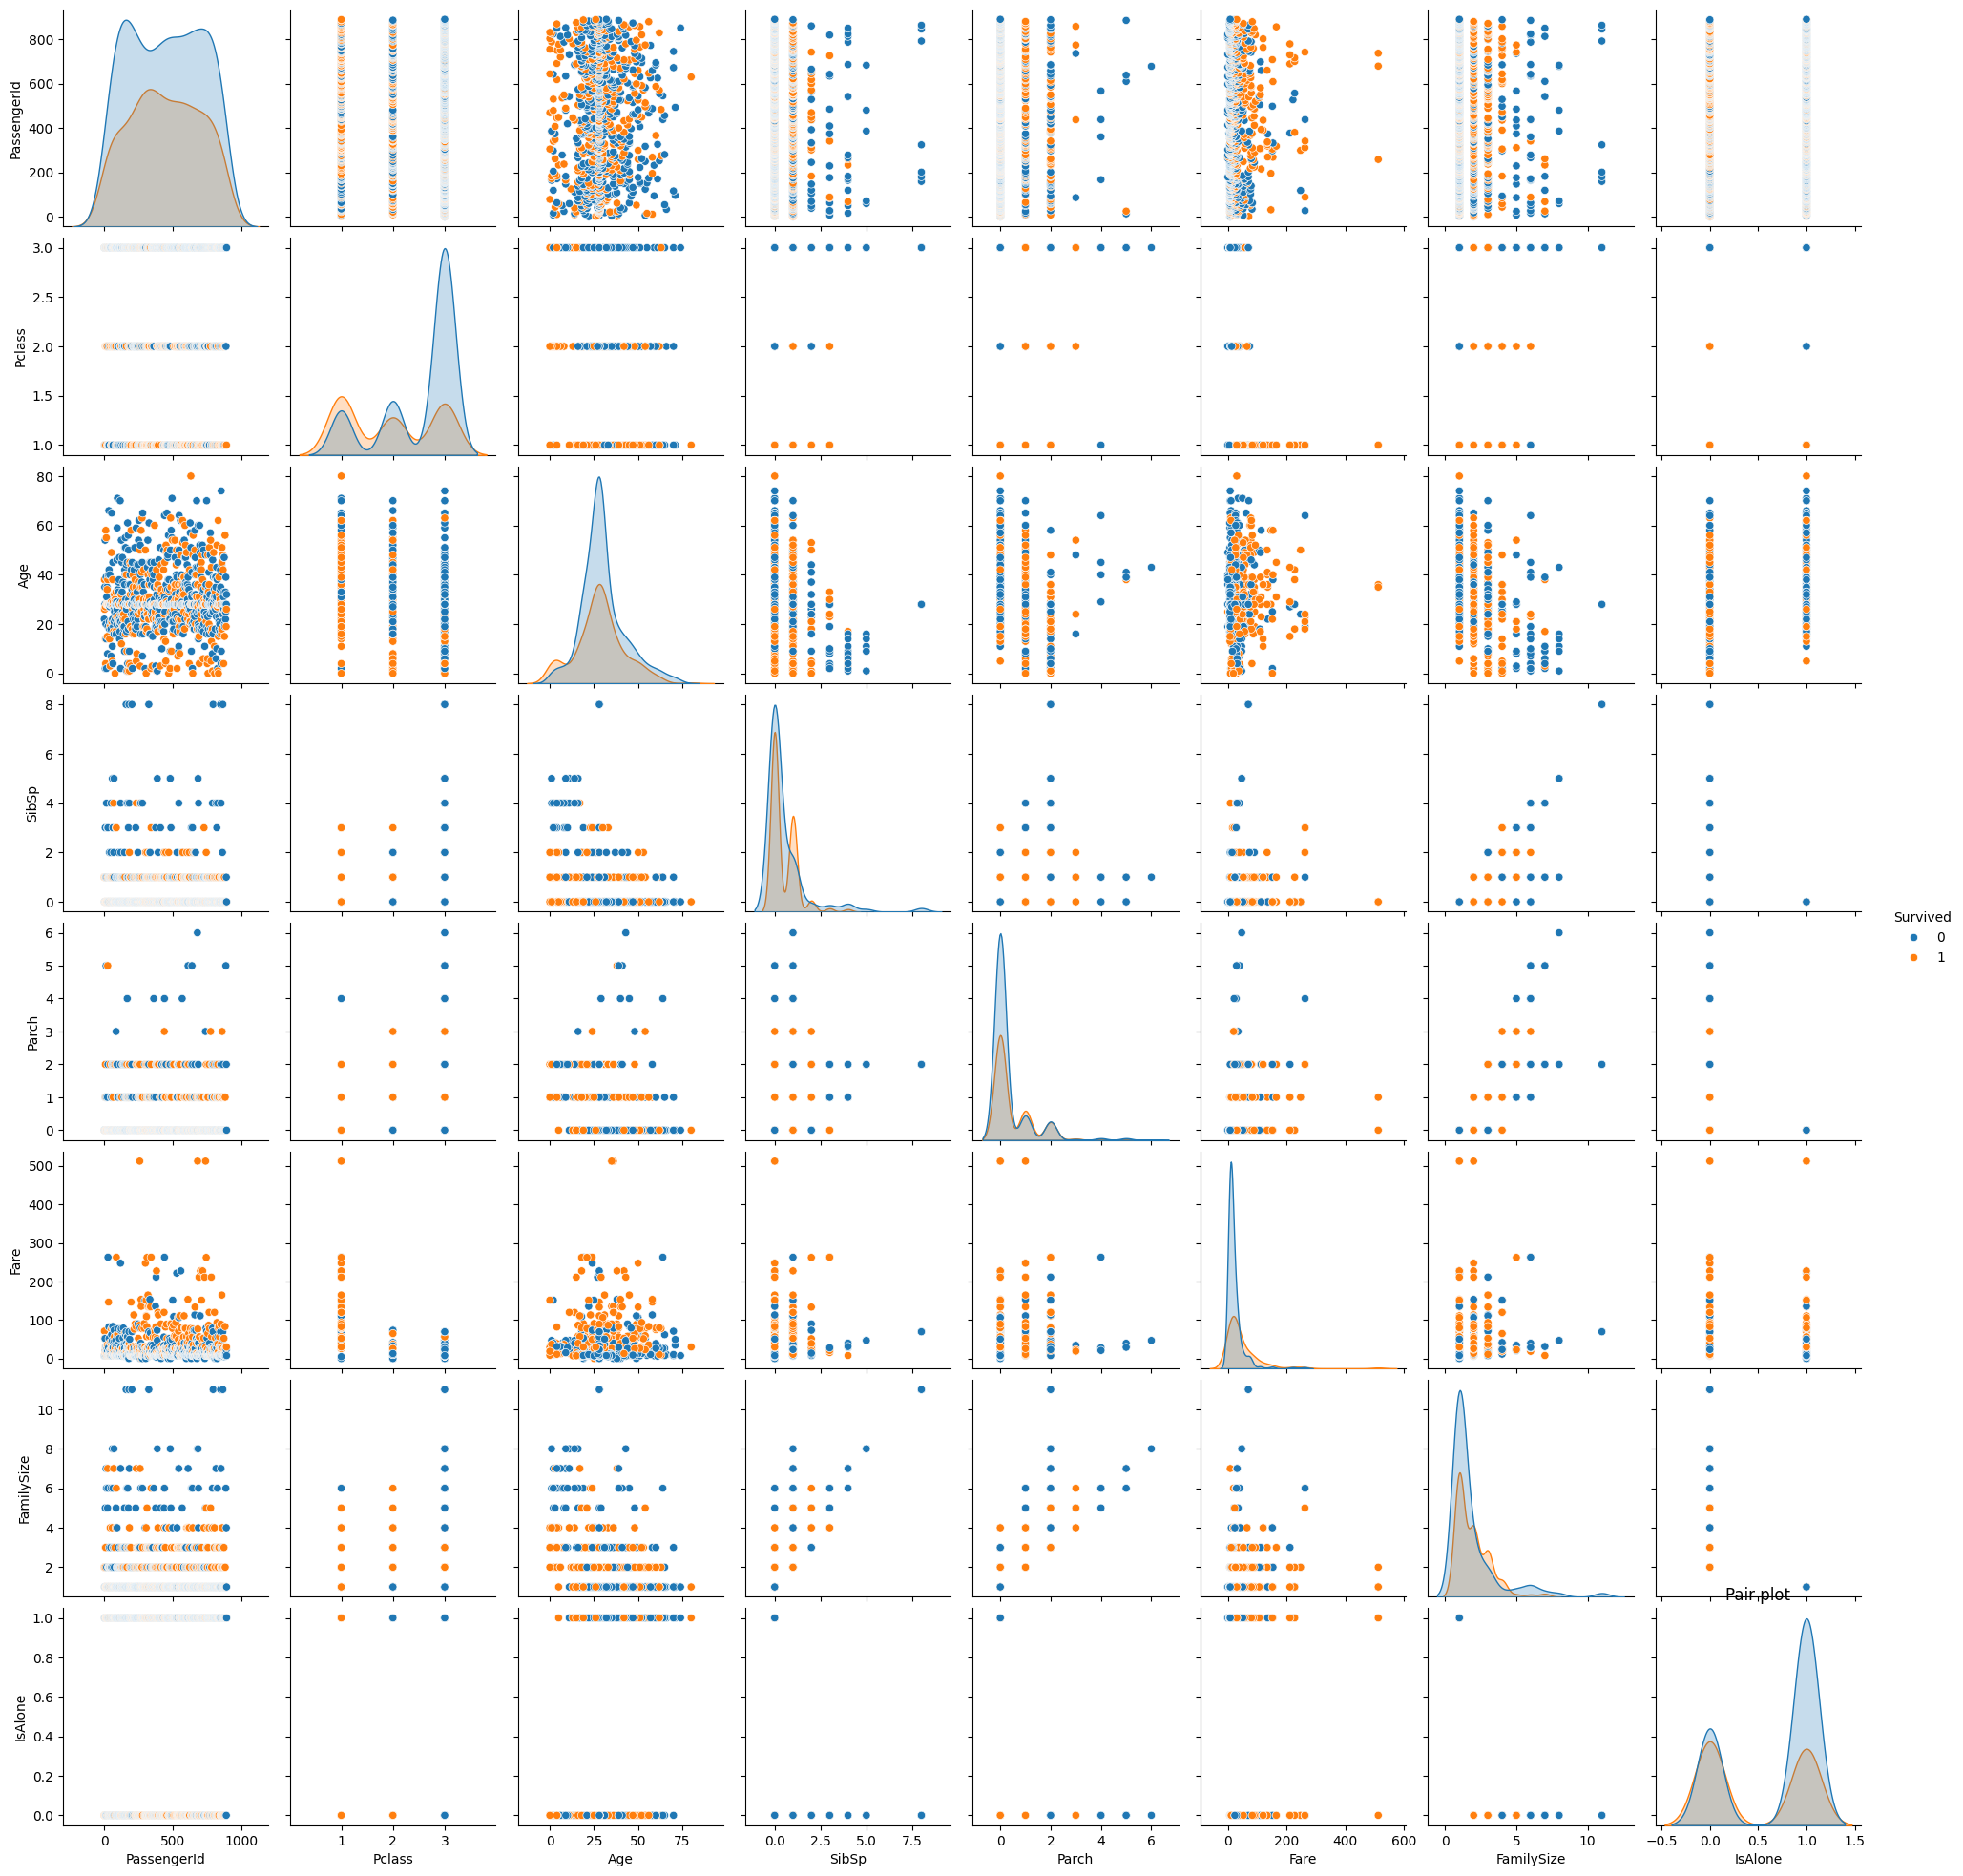

In [117]:
sns.pairplot(df, hue='Survived')
plt.title('Pair plot')
plt.show()


---
## **Outlier Detection**

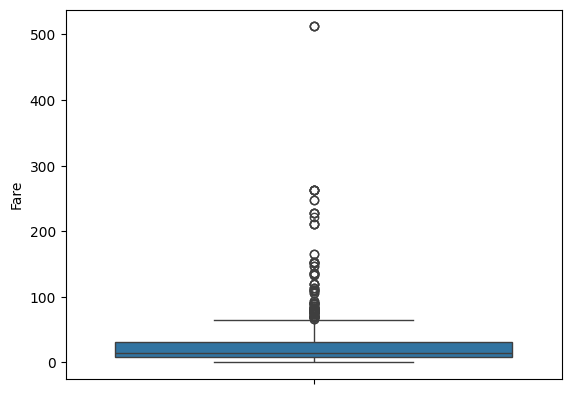

In [122]:
sns.boxplot(df['Fare'])
plt.show()


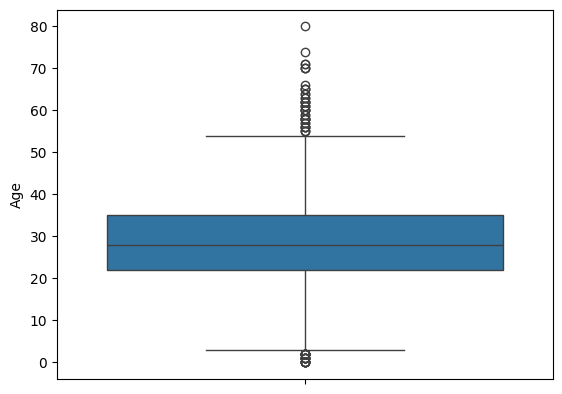

In [121]:
sns.boxplot(df['Age'])
plt.show()

---

# **Final Report**



##  Data Understanding

* The dataset was successfully loaded and inspected.
* It contains **891 rows** and **12 columns** representing passenger demographics, ticket details, and survival status.

---

##  Data Cleaning

* Checked for duplicate records — **no duplicate rows found**.
* Identified missing values in:

  * **Cabin**
  * **Embarked**
  * **Age**
* Cleaning steps performed:

  * **Cabin column dropped** due to excessive missing values.
  * **Embarked null values** filled using **mode** (most frequent port).
  * **Age null values** filled using **median** to handle skewness and outliers effectively.

---

##  Feature Engineering

* Created **FamilySize** feature:

  ```
  FamilySize = SibSp + Parch + 1
  ```

  (Includes passenger themselves)

* Created **IsAlone** feature:

  * Passengers with FamilySize = 1 → Marked as Alone.
  * Helps analyze survival impact of traveling solo vs with family.

---

##  Key Insights

* **Survival Distribution**

  * 549 passengers did **not survive (≈61%)**
  * 342 passengers **survived (≈39%)**

* **Gender Distribution**

  * 577 passengers (≈65%) were **male**
  * 314 passengers (≈35%) were **female**

* **Age Distribution**

  * Majority of passengers were **young adults under 30**.
  * Peak concentration around **age 28**.
  * Age distribution is **right-skewed**.

* **Gender vs Survival**

  * Female survival rate is **significantly higher** than male survival rate.

* **Class vs Survival**

  * **1st Class passengers** had the highest survival rate.
  * Survival decreased in **2nd** and further in **3rd class**.

* **Children Survival**

  * Children showed a **higher survival probability**, supporting the “women and children first” evacuation policy.

* **Fare vs Survival**

  * Passengers who paid **higher fares** had better survival chances.
  * Indicates socioeconomic advantage in rescue access.

---


